In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import matplotlib_inline.backend_inline
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
import time

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

WD = Path("/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge")
os.chdir(WD)
TEMPDIR = WD.parent / "BROWN_COSMOS"

RECALCULATE_TEMPFILT = False

In [140]:
params = {}
params["FILTERS_RES"] = "data/filters/FILTER.RES+SPHEREx+7DT_reduced.res"
params["TEMPLATES_FILE"] = "BROWN_COSMOS.template"
params["TEMP_ERR_FILE"] = "../template_error_cosmos2020.txt"
params["TEMP_ERR_A2"] = 0.0  # nullify the template error

params["SYS_ERR"] = 0.01

params["MW_EBV"] = 0.016577
params["CAT_HAS_EXTCORR"] = False

params["CATALOG_FILE"] = "data/input/GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits"
# catalog_file = WD/"data"/"input"/"GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits"
dir_output = WD / "output" / "output_GAMA_COSMOS_7DS_WFS_SPHEREx"

if not dir_output.exists():
    dir_output.mkdir(parents=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params["MAIN_OUTPUT_FILE"] = "output"

params["APPLY_PRIOR"] = True
params["PRIOR_FILE"] = "../prior_K_TAO.dat"
params["PRIOR_FILTER"] = 466  # SPHEREx band corresponding to the K-band
params["PRIOR_ABZP"] = 23.9
params["PRIOR_FLOOR"] = 0.01

params["FIX_ZSPEC"] = False
params["Z_MIN"] = 0.002
params["Z_MAX"] = 5.8
params["Z_STEP"] = 0.01
params["Z_STEP_TYPE"] = 1

translate_filename = "dummy.translate"

params_GAMA_COSMOS_7DS_SPHEREx = params.copy()

In [141]:
params["CATALOG_FILE"] = "data/input/COSMOS_input_7DS_IMS_SPHEREx_deep.fits"
dir_output = WD / "output" / "output_COSMOS_7DS_IMS_SPHEREx_deep"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_COSMOS_7DS_IMS_SPHEREx_deep = params.copy()

params["CATALOG_FILE"] = "data/input/GAMA_COSMOS_input_SPHEREx.fits"
dir_output = WD / "output" / "output_GAMA_COSMOS_SPHEREx"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_GAMA_COSMOS_SPHEREx = params.copy()

In [27]:
ez = eazy.photoz.PhotoZ(
    param_file=None,
    translate_file=translate_filename,
    zeropoint_file=None,
    n_proc=60,
    params=params_GAMA_COSMOS_7DS_SPHEREx,
)

with open("data/tempfilt_SPHEREx+7DS.pickle", "wb") as wfile:
    pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits
   >>> NOBJ = 210165
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443

100%|██████████| 160/160 [02:16<00:00,  1.17it/s]


Template   0: NGC_4826_spec.dat (NZ=1).
Template   1: NGC_4385_spec.dat (NZ=1).
Template   2: NGC_5104_spec.dat (NZ=1).
Template   3: UGC_09618_S_spec.dat (NZ=1).
Template   4: NGC_0337_spec.dat (NZ=1).
Template   5: NGC_4138_spec.dat (NZ=1).
Template   6: UGCA_219_spec.dat (NZ=1).
Template   7: NGC_1275_spec.dat (NZ=1).
Template   8: NGC_3627_spec.dat (NZ=1).
Template   9: NGC_4194_spec.dat (NZ=1).
Template  10: UGC_05101_spec.dat (NZ=1).
Template  11: NGC_5033_spec.dat (NZ=1).
Template  12: IC_5298_spec.dat (NZ=1).
Template  13: IC_4051_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: UGC_06850_spec.dat (NZ=1).
Template  16: Arp_118_spec.dat (NZ=1).
Template  17: NGC_4458_spec.dat (NZ=1).
Template  18: NGC_5866_spec.dat (NZ=1).
Template  19: NGC_2537_spec.dat (NZ=1).
Template  20: NGC_4551_spec.dat (NZ=1).
Template  21: NGC_4550_spec.dat (NZ=1).
Template  22: CGCG_453-062_spec.dat (NZ=1).
Template  23: NGC_3379_spec.dat (NZ=1).
Template  24: Mrk_1490_spec.dat (NZ

192it [01:15,  2.53it/s]


In [28]:
ez = eazy.photoz.PhotoZ(
    param_file=None,
    translate_file=translate_filename,
    zeropoint_file=None,
    n_proc=60,
    params=params_GAMA_COSMOS_SPHEREx,
)

with open("data/tempfilt_SPHEREx.pickle", "wb") as wfile:
    pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/GAMA_COSMOS_input_SPHEREx.fits
   >>> NOBJ = 210165
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (4

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  ../prior_K_TAO.dat
Template grid: BROWN_COSMOS.template (this may take some time)


100%|██████████| 160/160 [01:33<00:00,  1.71it/s]


Template   0: NGC_4826_spec.dat (NZ=1).
Template   1: NGC_4385_spec.dat (NZ=1).
Template   2: NGC_5104_spec.dat (NZ=1).
Template   3: UGC_09618_S_spec.dat (NZ=1).
Template   4: NGC_0337_spec.dat (NZ=1).
Template   5: NGC_4138_spec.dat (NZ=1).
Template   6: UGCA_219_spec.dat (NZ=1).
Template   7: NGC_1275_spec.dat (NZ=1).
Template   8: NGC_3627_spec.dat (NZ=1).
Template   9: NGC_4194_spec.dat (NZ=1).
Template  10: UGC_05101_spec.dat (NZ=1).
Template  11: NGC_5033_spec.dat (NZ=1).
Template  12: IC_5298_spec.dat (NZ=1).
Template  13: IC_4051_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: UGC_06850_spec.dat (NZ=1).
Template  16: Arp_118_spec.dat (NZ=1).
Template  17: NGC_4458_spec.dat (NZ=1).
Template  18: NGC_5866_spec.dat (NZ=1).
Template  19: NGC_2537_spec.dat (NZ=1).
Template  20: NGC_4551_spec.dat (NZ=1).
Template  21: NGC_4550_spec.dat (NZ=1).
Template  22: CGCG_453-062_spec.dat (NZ=1).
Template  23: NGC_3379_spec.dat (NZ=1).
Template  24: Mrk_1490_spec.dat (NZ

191it [00:55,  3.44it/s]


In [142]:
params["CATALOG_FILE"] = "data/input/GAMA_input_7DS_IMS.fits"
dir_output = WD / "output" / "output_GAMA_7DS_IMS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params["PRIOR_FILE"] = "../prior_R_zmax7.dat"
params["PRIOR_FILTER"] = 531  # 7DT band corresponding to the R-band
params_GAMA_7DS_IMS = params.copy()

params["CATALOG_FILE"] = "data/input/GAMA_input_7DS_WFS.fits"
dir_output = WD / "output" / "output_GAMA_7DS_WFS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_GAMA_7DS_WFS = params.copy()

params["CATALOG_FILE"] = "data/input/GAMA_input_7DS_RIS.fits"
dir_output = WD / "output" / "output_GAMA_7DS_RIS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_GAMA_7DS_RIS = params.copy()


params["CATALOG_FILE"] = "data/input/COSMOS_input_7DS_IMS.fits"
dir_output = WD / "output" / "output_COSMOS_7DS_IMS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params["PRIOR_FILE"] = "../prior_R_zmax7.dat"
params["PRIOR_FILTER"] = 531  # 7DT band corresponding to the R-band
params_COSMOS_7DS_IMS = params.copy()

params["CATALOG_FILE"] = "data/input/COSMOS_input_7DS_WFS.fits"
dir_output = WD / "output" / "output_COSMOS_7DS_WFS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_COSMOS_7DS_WFS = params.copy()

params["CATALOG_FILE"] = "data/input/COSMOS_input_7DS_RIS.fits"
dir_output = WD / "output" / "output_COSMOS_7DS_RIS"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_COSMOS_7DS_RIS = params.copy()

In [13]:
ez = eazy.photoz.PhotoZ(
    param_file=None,
    translate_file=translate_filename,
    zeropoint_file=None,
    n_proc=60,
    params=params_GAMA_7DS_RIS,
)

with open("data/tempfilt_7DS.pickle", "wb") as wfile:
    pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/GAMA_input_7DS_RIS.fits
   >>> NOBJ = 44124
F521 E521 (521): 7DT_4000_fitted
F522 E522 (522): 7DT_4250_fitted
F523 E523 (523): 7DT_4500_fitted
F524 E524 (524): 7DT_4750_fitted
F525 E525 (525): 7DT_5000_fitted
F526 E526 (526): 7DT_5250_fitted
F527 E527 (527): 7DT_5500_fitted
F528 E528 (528): 7DT_5750_fitted
F529 E529 (529): 7DT_6000_fitted
F530 E530 (530): 7DT_6250_fitted
F531 E531 (531): 7DT_6500_fitted
F532 E532 (532): 7DT_6750_fitted
F533 E533 (533): 7DT_7000_fitted
F534 E534 (534): 7DT_7250_fitted
F535 E535 (535): 7DT_7500_fitted
F536 E536 (536): 7DT_7750_fitted
F537 E537 (537): 7DT_8000_fitted
F538 E538 (538): 7DT_8250_fitted
F539 E539 (539): 7DT_8500_fitted
F540 E540 (540): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)


/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  ../prior_R_zmax7.dat
Template grid: BROWN_COSMOS.template (this may take some time)


100%|██████████| 160/160 [01:01<00:00,  2.62it/s]


Template   0: NGC_4826_spec.dat (NZ=1).
Template   1: NGC_4385_spec.dat (NZ=1).
Template   2: NGC_5104_spec.dat (NZ=1).
Template   3: UGC_09618_S_spec.dat (NZ=1).
Template   4: NGC_0337_spec.dat (NZ=1).
Template   5: NGC_4138_spec.dat (NZ=1).
Template   6: UGCA_219_spec.dat (NZ=1).
Template   7: NGC_1275_spec.dat (NZ=1).
Template   8: NGC_3627_spec.dat (NZ=1).
Template   9: NGC_4194_spec.dat (NZ=1).
Template  10: UGC_05101_spec.dat (NZ=1).
Template  11: NGC_5033_spec.dat (NZ=1).
Template  12: IC_5298_spec.dat (NZ=1).
Template  13: IC_4051_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: UGC_06850_spec.dat (NZ=1).
Template  16: Arp_118_spec.dat (NZ=1).
Template  17: NGC_4458_spec.dat (NZ=1).
Template  18: NGC_5866_spec.dat (NZ=1).
Template  19: NGC_2537_spec.dat (NZ=1).
Template  20: NGC_4551_spec.dat (NZ=1).
Template  21: NGC_4550_spec.dat (NZ=1).
Template  22: CGCG_453-062_spec.dat (NZ=1).
Template  23: NGC_3379_spec.dat (NZ=1).
Template  24: Mrk_1490_spec.dat (NZ

192it [00:01, 150.56it/s]


In [135]:
from utils import (
    fit_catalog_single_template,
    fit_at_zbest_single_template,
    pz_percentiles,
)
import logging


def get_pit(zspec, zgrid, lnp, trdz):
    """
    PIT function for evaluating the calibration of p(z),
    as described in Tanaka (2017).
    """
    zspec_grid = np.dot(zspec[:, None], np.ones_like(zgrid)[None, :])
    zlim = zspec_grid >= zgrid
    pit = np.dot(np.exp(lnp) * zlim, trdz)

    return pit


def get_crps(zspec, zgrid, lnp, trdz):
    """
    CRPS function for evaluating the calibration of p(z),
    as described in Tanaka (2017).
    """
    from tqdm import trange

    crps = np.empty(len(lnp), dtype=float)
    for i in trange(len(lnp), desc="Calculating CRPS"):
        zzgrid = np.dot(zgrid[:, None], np.ones_like(zgrid)[None, :])
        lnpgrid = np.dot(np.ones_like(zgrid)[:, None], lnp[i][None, :])
        zlim = zzgrid >= zgrid
        h = np.zeros_like(zgrid)
        h[zgrid >= zspec[i]] = 1
        pit = np.dot(np.exp(lnpgrid) * zlim, trdz)
        crps[i] = np.dot((pit - h) ** 2, trdz)

    return crps


def fit_and_save_result_prior(
    params, tempfilt, logger, n_proc=1, rerun=False, run_single_template=True
):
    start = time.time()
    logger.info(f"Running fit_and_save_result_prior with {n_proc} processes")

    dir_output = Path(params["OUTPUT_DIRECTORY"])

    base = Table.read(params["CATALOG_FILE"])
    Ncat = len(base)
    Nbatch = np.ceil(Ncat / 10000).astype(int)

    logger.info(f"Fitting {Ncat} objects in {Nbatch} batches ==")

    for i in range(Nbatch):
        iter_start = time.time()
        outtabpath = dir_output / f"output{i:02d}.fits"
        lnptabpath = dir_output / f"lnp{i:02d}.fits"

        if (outtabpath.exists() and lnptabpath.exists()) and (not rerun):
            logger.info(f"{i}th batch already exists ==============")
        else:
            logger.info(f"Fitting {i}th batch =====================")
            start_id = i * 10000
            end_id = (i + 1) * 10000

            # initialize eazy object
            # (if initialized outside the loop, wiredly, it uses more and more processes in fit_at_zbest)
            ez = eazy.photoz.PhotoZ(
                param_file=None,
                translate_file=translate_filename,
                zeropoint_file=None,
                params=params,
                tempfilt=tempfilt,
            )

            if end_id > len(ez.idx):
                end_id = len(ez.idx)

            if run_single_template:
                ez.ZML_WITH_PRIOR = True
                fit_catalog_single_template(
                    ez, ez.idx[start_id:end_id], n_proc=n_proc, prior=True
                )
                ez.ZML_WITH_PRIOR = True
                fit_at_zbest_single_template(ez, prior=True, nproc=1)
            else:
                ez.fit_catalog(ez.idx[start_id:end_id], n_proc=n_proc, prior=True)
                ez.ZML_WITH_PRIOR = True
                ez.fit_at_zbest(prior=True, nproc=1)

            try:
                idxarr = np.arange(len(ez.idx))
                selection = (idxarr >= start_id) & (idxarr < end_id)
                zlimits, pit, crps = pz_percentiles(
                    ez,
                    percentiles=[2.5, 16, 50, 84, 97.5],
                    oversample=5,
                    selection=selection,
                    return_pit_crps=True,
                )
            except Exception as e:
                logger.debug("Couldn't compute pz_percentiles")
                logger.debug(e)
                zlimits = np.zeros((ez.NOBJ, 5), dtype=ez.ARRAY_DTYPE) - 1

            tab = Table()
            tab["id"] = ez.OBJID
            tab["z_phot"] = ez.zbest
            tab["z_phot_chi2"] = ez.chi2_best
            tab["z025"] = zlimits[:, 0]
            tab["z160"] = zlimits[:, 1]
            tab["z500"] = zlimits[:, 2]
            tab["z840"] = zlimits[:, 3]
            tab["z975"] = zlimits[:, 4]

            # pit = ez.PIT(ez.ZSPEC)
            tab["pit"] = pit

            # crps = get_crps(
            #     ez.ZSPEC[start_id:end_id], ez.zgrid, ez.lnp[start_id:end_id], ez.trdz
            # )
            # tab["crps"] = np.empty(len(tab), dtype=float)
            # tab["crps"][start_id:end_id] = crps
            tab["crps"] = crps

            tab[start_id:end_id].write(outtabpath, overwrite=True)
            phdu = fits.PrimaryHDU(data=ez.lnp[start_id:end_id])
            gridhdu = fits.ImageHDU(data=ez.zgrid)
            hdul = fits.HDUList([phdu, gridhdu])
            hdul.writeto(lnptabpath, overwrite=True)
            del tab, phdu, gridhdu, hdul
            gc.collect()
            iter_end = time.time()
            time_taken_hms = time.strftime(
                "%H:%M:%S", time.gmtime(iter_end - iter_start)
            )
            logger.info(f" --- finished {i}th batch in {time_taken_hms}")

    colnames = ["z_phot", "z_phot_chi2", "z160", "z840", "pit", "crps", "id"]
    for label in colnames:
        base[label] = np.empty(len(base), dtype=float)

    for i in range(Nbatch):
        start_id = i * 10000
        end_id = (i + 1) * 10000 if i < Nbatch - 1 else len(base)

        outtab = Table.read(dir_output / f"output{i:02d}.fits")
        for label in colnames:
            base[label][start_id:end_id] = outtab[label]

    base.write(dir_output / "result.fits", overwrite=True)

    end = time.time()
    time_taken_hms = time.strftime("%H:%M:%S", time.gmtime(end - start))
    logger.info(f"Finished in {time_taken_hms}")

In [7]:
with open("data/tempfilt_SPHEREx+7DS.pickle", "rb") as rfile:
    tempfilt_SPHEREx_7DS = pickle.load(rfile)

with open("data/tempfilt_SPHEREx.pickle", "rb") as rfile:
    tempfilt_SPHEREx = pickle.load(rfile)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
logger = logging.getLogger("3rd_challenge_eazy_run")
logger.setLevel(logging.INFO)

formatter = logging.Formatter("%(asctime)s :: %(levelname)s :: %(message)s")
handler_stream = logging.StreamHandler()
handler_stream.setLevel(logging.DEBUG)
handler_stream.setFormatter(formatter)
handler_file = logging.FileHandler(WD / "3rd_challenge_eazy_run.log")
handler_file.setFormatter(formatter)

logger.addHandler(handler_stream)
logger.addHandler(handler_file)

In [ ]:
rerun = True

logger.info(">>>> (re)starting GAMA_COSMOS_7DS_SPHEREx")
fit_and_save_result_prior(params_GAMA_COSMOS_7DS_SPHEREx, tempfilt_SPHEREx_7DS, logger, rerun=rerun)
# logger.info(">>>> (re)starting COSMOS_7DS_IMS_SPHEREx_deep")
# fit_and_save_result_prior(
#     params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger, rerun=rerun
# )
logger.info(">>>> (re)starting GAMA_COSMOS_SPHEREx")
fit_and_save_result_prior(params_GAMA_COSMOS_SPHEREx, tempfilt_SPHEREx, logger, rerun=rerun)

In [ ]:
rerun = True

with open("data/tempfilt_7DS.pickle", "rb") as rfile:
    tempfilt_7DS = pickle.load(rfile)

logger.info(">>>> (re)starting GAMA_7DS_RIS")
fit_and_save_result_prior(params_GAMA_7DS_RIS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

logger.info(">>>> (re)starting GAMA_7DS_IMS")
fit_and_save_result_prior(params_GAMA_7DS_IMS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

logger.info(">>>> (re)starting GAMA_7DS_WFS")
fit_and_save_result_prior(params_GAMA_7DS_WFS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

In [ ]:
rerun = True

logger.info(">>>> (re)starting COSMOS_7DS_RIS")
fit_and_save_result_prior(params_COSMOS_7DS_RIS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

logger.info(">>>> (re)starting COSMOS_7DS_IMS")
fit_and_save_result_prior(params_COSMOS_7DS_IMS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

logger.info(">>>> (re)starting COSMOS_7DS_WFS")
fit_and_save_result_prior(params_COSMOS_7DS_WFS, tempfilt_7DS, logger, n_proc=40, rerun=rerun)

In [18]:
ez = eazy.photoz.PhotoZ(
    param_file=None,
    translate_file=translate_filename,
    zeropoint_file=None,
    params=params_COSMOS_7DS_IMS_SPHEREx_deep,
    tempfilt=tempfilt_SPHEREx_7DS,
)
fit_catalog_single_template(ez, ez.idx, n_proc=1, prior=True)
ez.ZML_WITH_PRIOR = True
fit_at_zbest_single_template(ez, prior=True, nproc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/COSMOS_input_7DS_IMS_SPHEREx_deep.fits
   >>> NOBJ = 1000
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


192it [00:00, 1196.87it/s]
100%|██████████| 192/192 [00:45<00:00,  4.26it/s]


fit_best: 0.7 s (n_proc=1,  NOBJ=999)
fit_best: 0.6 s (n_proc=1,  NOBJ=999)


In [126]:
zlimits, pit, crps = pz_percentiles(
    ez,
    percentiles=[2.5, 16, 50, 84, 97.5],
    oversample=5,
    return_pit_crps=True,
)

In [123]:
_crps = get_crps(
    ez.ZSPEC, ez.zgrid, ez.lnp, ez.trdz
)

Calculating CRPS: 100%|██████████| 1000/1000 [00:00<00:00, 6448.77it/s]


In [133]:
_pit = get_pit(
    ez.ZSPEC, ez.zgrid, ez.lnp, ez.trdz
)

In [44]:
zlimits = ez.pz_percentiles(percentiles=[2.5, 16, 50, 84, 97.5], oversample=10)
sigma = (zlimits[:, 3] - zlimits[:, 1]) / 2

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:3853: RuntimeWarning: invalid value encountered in divide
  pzcum = (pzcum.T / pzcmax).T


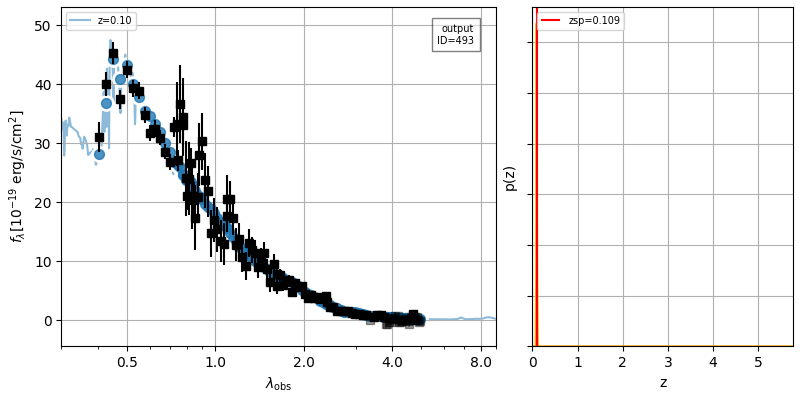

In [25]:
from utils import show_fit_single_template

_ = show_fit_single_template(ez, 0, id_is_idx=True)

In [49]:
-2.5 * np.log10(0.8)

0.242275032520141

In [106]:
from eazy.utils import log_zgrid

self = ez
percentiles = [2.5, 16, 50, 84, 97.5]
oversample = 5
selection = None
import scipy.interpolate

try:
    from scipy.integrate import cumtrapz
except ImportError:
    from scipy.integrate import cumulative_trapezoid as cumtrapz

interpolator = scipy.interpolate.Akima1DInterpolator

p100 = np.array(percentiles) / 100.0
zlimits = np.zeros((self.NOBJ, p100.size), dtype=self.ARRAY_DTYPE)

zr = [self.param["Z_MIN"], self.param["Z_MAX"]]
zgrid_zoom = log_zgrid(zr=zr, dz=self.param["Z_STEP"] / oversample)

ok = self.zbest > self.zgrid[0]
if selection is not None:
    ok &= selection

if ok.sum() == 0:
    print("pz_percentiles: No objects in selection")

spl = interpolator(self.zgrid, self.lnp[ok, :], axis=1)

pz_zoom = np.exp(spl(zgrid_zoom))

# Akima1DInterpolator can get some NaNs at the end?
valid = np.isfinite(pz_zoom)
pz_zoom[~valid] = 0.0

pzcum = cumtrapz(pz_zoom, x=zgrid_zoom, axis=1)

pzcmax = pzcum.max(axis=1)
pzcum = (pzcum.T / pzcmax).T

for j, i in enumerate(self.idx[ok]):
    zlimits[i, :] = np.interp(p100, pzcum[j, :], zgrid_zoom[1:])

In [107]:
pzcum

array([[1.23497662e-14, 2.99305653e-14, 3.74955473e-14, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.83083342e-03, 5.25900755e-03, 8.26271992e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.18183134e-04, 1.61315366e-03, 2.82560632e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [5.32781421e-05, 1.63008486e-04, 2.79069169e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.38095243e-03, 6.79614935e-03, 1.06088747e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.55367673e-08, 1.02411594e-07, 1.62486332e-07, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [108]:
zlimits[:, 3]

array([0.10299039, 2.945905  , 0.36176774, 0.47142822, 2.4569356 ,
       0.9808618 , 0.35919392, 0.8179157 , 3.7631745 , 1.2795157 ,
       1.1421533 , 3.204818  , 0.9845442 , 0.32451957, 3.292328  ,
       1.2531537 , 2.424596  , 2.01656   , 0.5342679 , 0.8685658 ,
       1.5328133 , 1.9420601 , 0.6073102 , 1.4270239 , 0.27137968,
       0.7661667 , 3.9328482 , 0.8054464 , 3.2939124 , 2.7231326 ,
       1.1976997 , 1.6687622 , 3.3178906 , 1.0828831 , 1.9287157 ,
       0.5624148 , 1.3245238 , 3.1638353 , 1.0208172 , 3.586323  ,
       0.8755606 , 1.2448995 , 1.12192   , 0.54555786, 1.9286855 ,
       0.30267784, 3.318821  , 1.4364192 , 2.0710425 , 1.7696713 ,
       0.5511191 , 1.9499624 , 1.4433831 , 2.1176121 , 2.1055896 ,
       0.7465153 , 1.0918914 , 0.7282025 , 0.78905565, 2.5581336 ,
       0.64230996, 1.7425611 , 0.5093622 , 0.3242786 , 0.64733785,
       2.4749718 , 0.6707902 , 1.2758306 , 1.6118819 , 2.073529  ,
       1.2486892 , 1.5228813 , 1.8632202 , 1.5268732 , 1.51467

In [70]:
spl = interpolator(self.zgrid, self.lnp[ok, :], axis=1)
pzcum = cumtrapz(np.exp(spl(zgrid_zoom)), x=zgrid_zoom, axis=1)

In [84]:
np.exp(spl(zgrid_zoom))

array([[           nan, 1.33153435e-11, 5.60215278e-12, ...,
                   nan,            nan,            nan],
       [           nan, 1.74943051e+00, 1.51977445e+00, ...,
                   nan,            nan,            nan],
       [           nan, 5.15238036e-01, 5.71333898e-01, ...,
                   nan,            nan,            nan],
       ...,
       [           nan, 5.24265453e-02, 5.53341337e-02, ...,
                   nan,            nan,            nan],
       [           nan, 2.36192071e+00, 2.00923307e+00, ...,
                   nan,            nan,            nan],
       [           nan, 3.26910091e-05, 2.87056140e-05, ...,
                   nan,            nan,            nan]])

(0.05, 0.15)

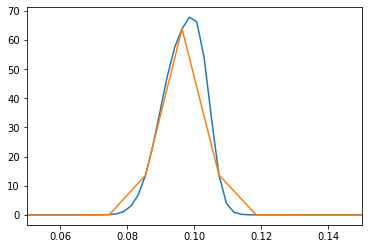

In [82]:
from matplotlib import pyplot as plt

plt.plot(zgrid_zoom, np.exp(spl(zgrid_zoom)[0]))
plt.plot(ez.zgrid, np.exp(ez.lnp[0]))
plt.xlim(0.05, 0.15)